## Imports

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

### Apply the SVD on images
- We will use the SVD to extract the more important features from the image
- Let’s start by loading an image in python and convert it to a Numpy array. We will convert it to grayscale to have one dimension per pixel. The shape of the matrix corresponds to the dimension of the image filled with intensity values: 1 cell per pixel.
- [Singular value decomposition of an image](https://www.frankcleary.com/svdimage/)

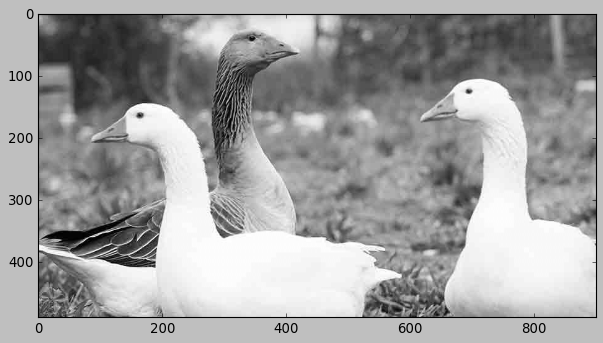

In [2]:
from PIL import Image

plt.style.use('classic')
img = Image.open('goose.jpg')
# convert image to grayscale
imggray = img.convert('LA')
# convert to numpy array
imgmat = np.array(list(imggray.getdata(band=0)), float)
# Reshape according to orginal image dimensions
imgmat.shape = (imggray.size[1], imggray.size[0])

plt.figure(figsize=(9, 6))
plt.imshow(imgmat, cmap='gray')
plt.show()

### Find SVD for the image data matrix (imgmat) and check the chape of the matrices (imgmat, U, D, and V)

In [3]:
U, D, V = np.linalg.svd(imgmat)

In [4]:
imgmat.shape

(488, 900)

In [5]:
U.shape

(488, 488)

In [6]:
D.shape

(488,)

In [7]:
V.shape

(900, 900)

### Remember that D are the singular values that need to be put into a diagonal matrix. Also, V doesn’t need to be transposed 

#### The singular vectors and singular values are ordered with the first ones corresponding to the more variance explained. For this reason, using just the first few singular vectors and singular values will provide the reconstruction of the principal elements of the image.

### Reconstruct the image from the first 2 principal components
### Try reconstruct the image from higher number of principal components and see the difference

2


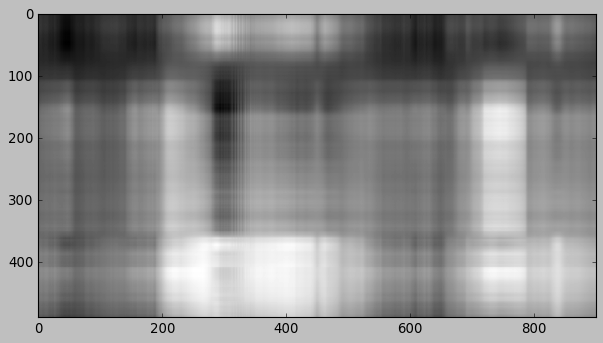

5


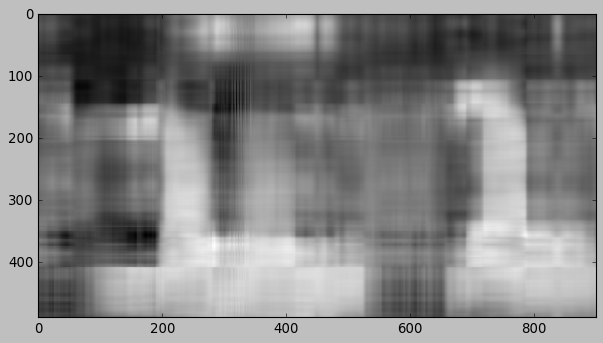

10


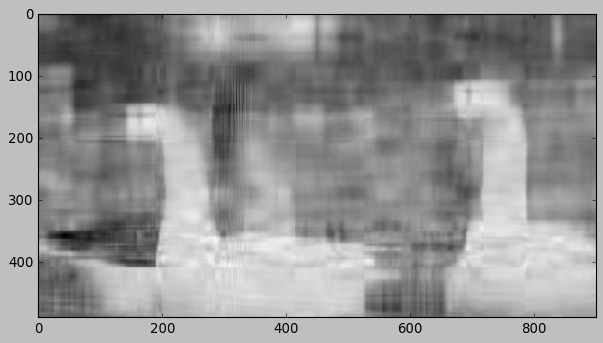

20


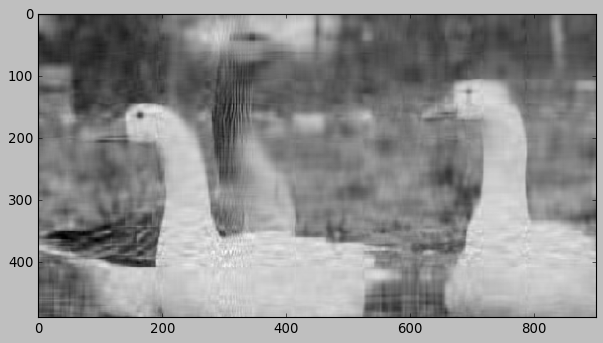

50


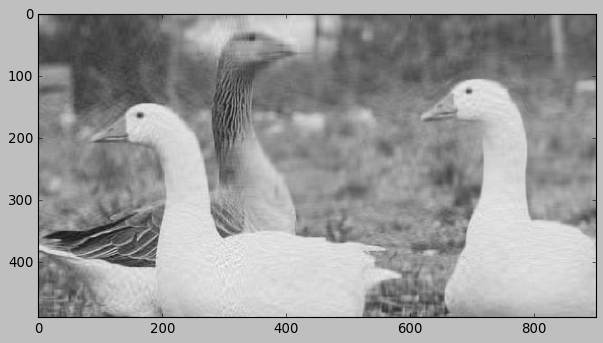

100


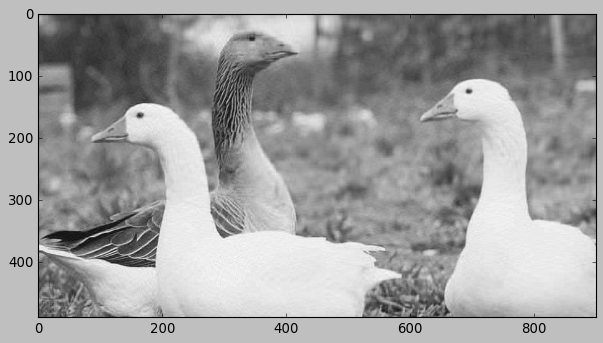

200


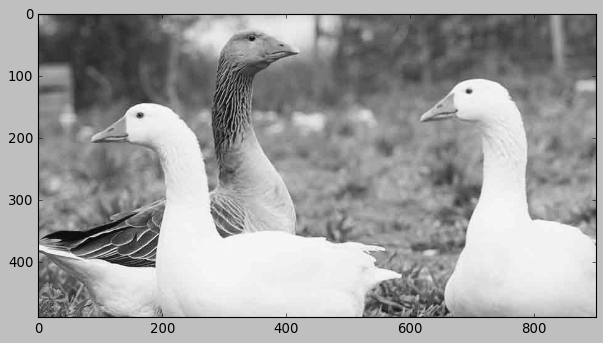

In [8]:
PC_list = [2,5,10,20,50,100,200]
for PCs in PC_list:
    imgmat  = U[:,:PCs] @ np.diag(D[:PCs]) @ V[:PCs,:]
    print(PCs)
    plt.figure(figsize=(9, 6))
    plt.imshow(imgmat, cmap='gray')
    plt.show()